In [1]:
from scipy.optimize import minimize, LinearConstraint
import numpy as np
import pandas as pd
import os
from multiprocessing import freeze_support

from tontine.portfolio import Portfolio
from tontine.data import MarketData, MortalityData
from tontine.utils import pi

In [2]:
survival_curve = pd.read_excel("../data/AG2022prob.xlsx")
survival_curve = survival_curve[(survival_curve["t"] > 0) & (survival_curve["t"] <= 35)]

mort_data = MortalityData(0.04, survival_curve)

risk_loadings = {
    "annuity": 0.05,
    "tontine": 0.011,
    "ul_tontine": 0,
    "ul_annuity": 0.038,
}

### Scenario 1: $\gamma$ = 0.85

In [3]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 0.85)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 0.85, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()


  3%|▎         | 3/100 [00:00<00:16,  5.75it/s]/home/othman/repos/tontine/.venv/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
100%|██████████| 100/100 [00:33<00:00,  3.01it/s]


#### Weights

In [4]:
ptfl.w

array([4.38965476e-01, 4.38965476e-01, 2.69089250e-06, 1.22066357e-01])

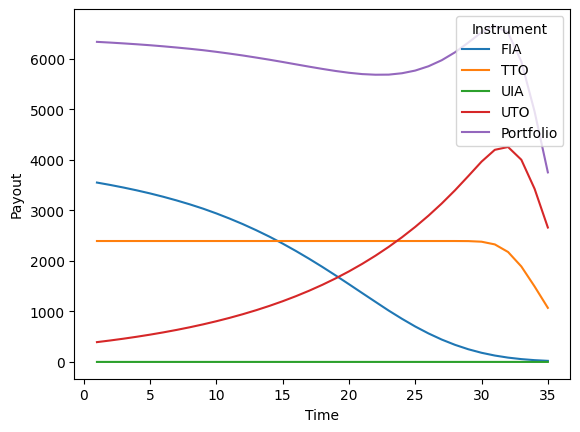

In [5]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_085.svg")

### Scenario 2: $\gamma$ = 1.5

In [6]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 1.5)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 1.5, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

 62%|██████▏   | 62/100 [00:16<00:09,  3.92it/s]

KeyboardInterrupt: 

#### Weights

In [ ]:
ptfl.w

array([0.4, 0.4, 0.1, 0.1])

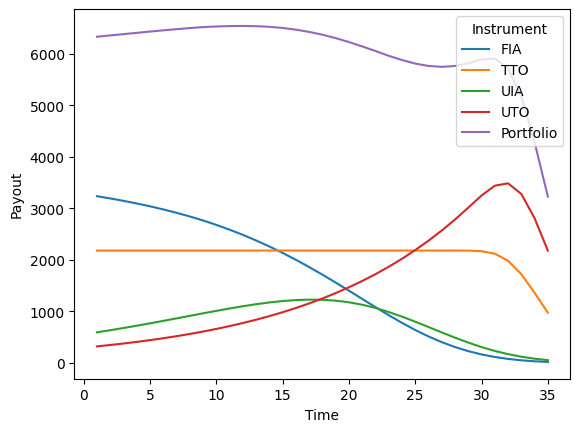

In [ ]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_150.svg")

### Scenario 3: $\gamma = 3$

In [ ]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 3.0)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 3.0, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

100%|██████████| 100/100 [00:23<00:00,  4.26it/s]


#### Weights

In [ ]:
ptfl.w

array([0.4, 0.4, 0.1, 0.1])

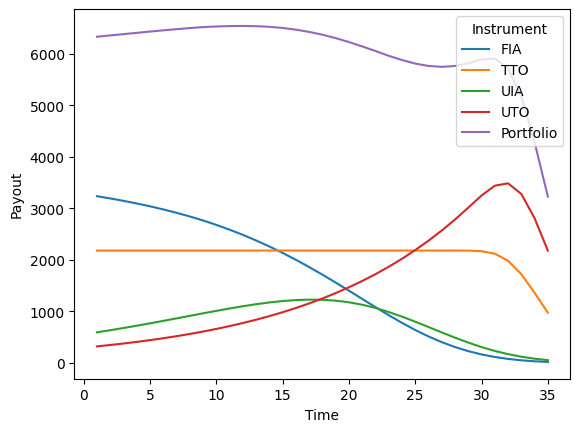

In [ ]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_300.svg")

### Scenario 4: $\gamma = 4.5$

In [ ]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 4.5)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 4.5, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()


100%|██████████| 100/100 [00:23<00:00,  4.18it/s]


#### Weights

In [ ]:
ptfl.w

array([0.4, 0.4, 0.1, 0.1])

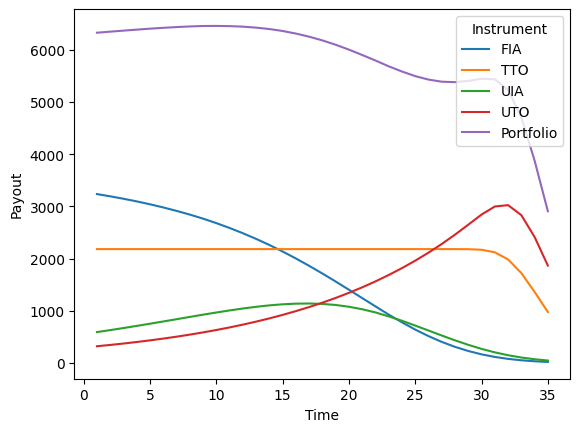

In [ ]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_450.svg")

### Scenario 5: $\gamma = 6$

In [ ]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 6.0)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 6.0, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


#### Weights

In [ ]:
ptfl.w

array([0.4, 0.4, 0.1, 0.1])

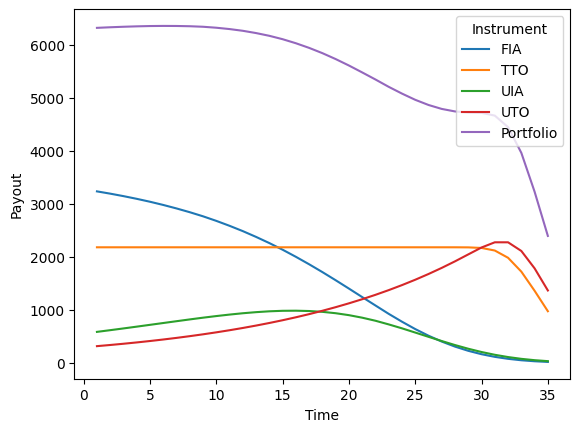

In [ ]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_600.svg")

### Scenario 6: $\gamma = 9$

In [ ]:
μ = 0.08
σ =  0.1
π = pi(μ, σ, mort_data, 9.0)

mkt_data = MarketData(μ, σ, π)
ptfl = Portfolio(1e5, 100, 9.0, risk_loadings, mkt_data, mort_data)

res = ptfl.optimise()

100%|██████████| 100/100 [00:26<00:00,  3.76it/s]


#### Weights

In [ ]:
ptfl.w

array([0.19230502, 0.19230502, 0.45050207, 0.1648879 ])

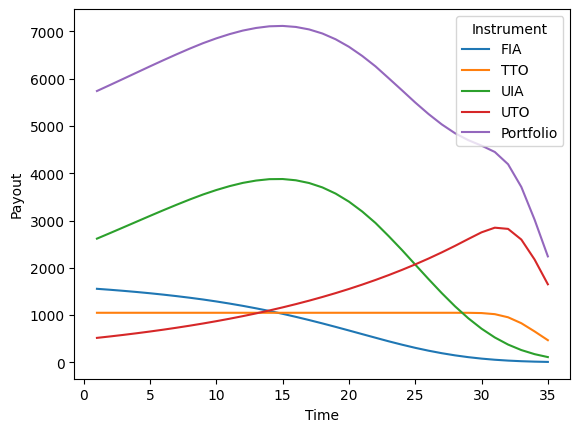

In [ ]:
plot = ptfl.plot()
plot.savefig("../output/ptfl_scenario_900.svg")